# Classical Dance Images Classifier
Dataset available at: https://www.kaggle.com/parthplc/indian-dance-images

We begin with the necessary imports

In [68]:
import tensorflow as tf 
from tensorflow import keras
import matplotlib.pyplot as plt
import os
import PIL
import numpy as np
from tensorflow.keras.preprocessing.image import ImageDataGenerator, array_to_img
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Input, Dropout, Flatten, Conv2D
from tensorflow.keras.layers import BatchNormalization, Activation, MaxPooling2D
from tensorflow.keras.optimizers import Adam

In [3]:
path_train = "train/"
path_val = "validation/"
path_test = "test/"

Now, we list out all the labels, the number of files in train, validation and test batches

In [15]:
classes = [label for label in os.listdir(path_train)]
classes

['bharatanatyam',
 'kathak',
 'kathakali',
 'kuchipudi',
 'manipuri',
 'mohiniyattam',
 'odissi',
 'sattriya']

In [4]:
for label in os.listdir(path_train):
    print(str(len(os.listdir(path_train + label))) + " " + label + " images")

1500 bharatanatyam images
500 kathak images
500 kathakali images
500 kuchipudi images
500 manipuri images
500 mohiniyattam images
500 odissi images
500 sattriya images


In [5]:
for label in os.listdir(path_val):
    print(str(len(os.listdir(path_val + label))) + " " + label + " images")

47 bharatanatyam images
44 kathak images
47 kathakali images
46 kuchipudi images
36 manipuri images
50 mohiniyattam images
49 odissi images
45 sattriya images


In [6]:
print("Number of test samples: ", str(len(os.listdir(path_test))))

Number of test samples:  156


We use Keras's ImageDataGenerator to process the train and validation sets for training the model

In [60]:
i = 128

train_datagen = ImageDataGenerator(rescale=1./255,
                                   horizontal_flip=True,
                                   rotation_range=20,
                                   shear_range=0.2,
                                   zoom_range=0.2)
val_datagen = ImageDataGenerator(rescale=1./255)

train_gen = train_datagen.flow_from_directory(path_train,
                                              target_size=(i, i),
                                              batch_size=64,
                                              shuffle=True,
                                              color_mode='rgb')

val_gen = val_datagen.flow_from_directory(path_val,
                                          target_size=(i, i),
                                          batch_size=64,
                                          shuffle=False,
                                          color_mode='rgb')

Found 5000 images belonging to 8 classes.
Found 364 images belonging to 8 classes.


We print a few sample images

In [66]:
x_batch, y_batch = next(train_gen)
images_arr = x_batch[:30]

fig, axes = plt.subplots(5, 6, figsize=(i,i))
axes = axes.flatten()
for img, ax in zip(images_arr, axes):
    ax.imshow(img)
plt.tight_layout()
plt.show()

Now, we begin building the model

In [9]:
model = Sequential([
    Conv2D(32, 3, padding='same', activation='relu', input_shape=(i,i,3)),
    MaxPooling2D(pool_size=(2,2)),
    Conv2D(64, 3, padding='same', activation='relu'),
    MaxPooling2D(pool_size=(2,2)),
    Conv2D(128, 3, padding='same', activation='relu'),
    MaxPooling2D(pool_size=(2,2)),
    Dropout(0.2), 
    Flatten(),
    Dense(256),
    Dense(8, activation='softmax')
])
adam = Adam(learning_rate=0.001)
model.compile(optimizer=adam, loss='categorical_crossentropy', metrics=['accuracy'])
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 128, 128, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 64, 64, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 64, 64, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 32, 32, 64)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 32, 32, 128)       73856     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 16, 16, 128)      0

Training the model

In [10]:
epochs = 15
callbacks = keras.callbacks.EarlyStopping(
    monitor='val_loss',
    patience=5,
    verbose=2
)

history = model.fit(train_gen, validation_data=val_gen, epochs=epochs, callbacks=[callbacks], verbose=2,
                   max_queue_size=20, workers=20)

Epoch 1/15
79/79 - 52s - loss: 1.8216 - accuracy: 0.3880 - val_loss: 1.3599 - val_accuracy: 0.5055 - 52s/epoch - 655ms/step
Epoch 2/15
79/79 - 39s - loss: 1.0653 - accuracy: 0.6310 - val_loss: 0.9330 - val_accuracy: 0.6456 - 39s/epoch - 491ms/step
Epoch 3/15
79/79 - 38s - loss: 0.7665 - accuracy: 0.7446 - val_loss: 0.8956 - val_accuracy: 0.6951 - 38s/epoch - 475ms/step
Epoch 4/15
79/79 - 41s - loss: 0.5535 - accuracy: 0.8162 - val_loss: 0.4610 - val_accuracy: 0.8489 - 41s/epoch - 522ms/step
Epoch 5/15
79/79 - 43s - loss: 0.3999 - accuracy: 0.8676 - val_loss: 0.4899 - val_accuracy: 0.8159 - 43s/epoch - 542ms/step
Epoch 6/15
79/79 - 51s - loss: 0.3351 - accuracy: 0.8932 - val_loss: 0.3571 - val_accuracy: 0.8736 - 51s/epoch - 648ms/step
Epoch 7/15
79/79 - 51s - loss: 0.2699 - accuracy: 0.9170 - val_loss: 0.3816 - val_accuracy: 0.8791 - 51s/epoch - 647ms/step
Epoch 8/15
79/79 - 53s - loss: 0.1987 - accuracy: 0.9370 - val_loss: 0.2215 - val_accuracy: 0.9203 - 53s/epoch - 666ms/step
Epoch 9/

Visualizing the results

[]

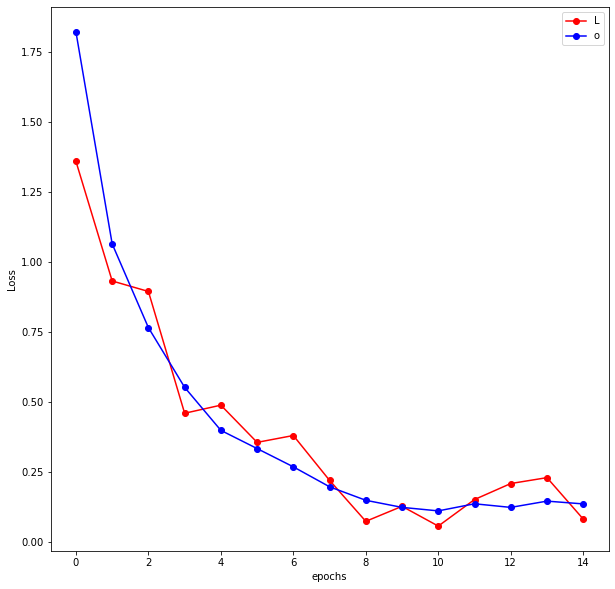

In [12]:
val_loss = history.history['val_loss']
train_loss = history.history['loss']

plt.figure(figsize=(10, 10))
plt.plot(val_loss, 'r-o', label='validation_loss')
plt.plot(train_loss, 'b-o', label='train_loss')
plt.xlabel('epochs')
plt.ylabel('Loss')
plt.legend('Loss vs No. of epochs')
plt.plot()

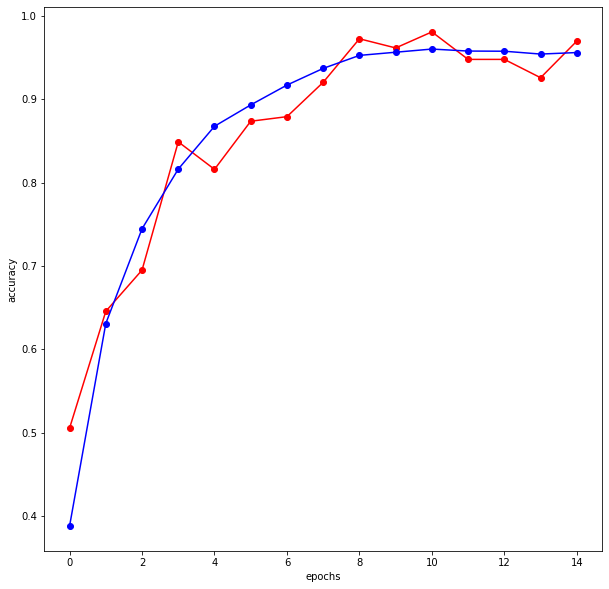

In [13]:
train_acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

plt.figure(figsize=(10, 10))
plt.plot(val_acc, 'r-o', label='val_accuracy')
plt.plot(train_acc, 'b-o', label='train_accuracy')
plt.ylabel('accuracy')
plt.xlabel('epochs')
plt.show()

We write a function in order to accept test images for prediction

In [23]:
import cv2
def prepare(path):
    imgsize=128
    img_array = cv2.imread(path)
    new_array = cv2.resize(img_array, (imgsize,imgsize))
    return new_array.reshape(-1,imgsize,imgsize,3)

Now we run all test images and print the predictions

In [69]:
predictions = []
matrix = []
for imagefile in os.listdir(path_test):
    p = model.predict([prepare(path_test+imagefile)])
    cl = np.argmax(p)
    matrix.append(p)
    predictions.append(cl)

In [70]:
for i in predictions:
    print(classes[i])

odissi
odissi
odissi
kathakali
odissi
odissi
odissi
bharatanatyam
bharatanatyam
odissi
bharatanatyam
kuchipudi
kathakali
bharatanatyam
bharatanatyam
odissi
kuchipudi
kathakali
bharatanatyam
odissi
kathakali
bharatanatyam
bharatanatyam
bharatanatyam
bharatanatyam
odissi
odissi
odissi
bharatanatyam
odissi
bharatanatyam
manipuri
odissi
bharatanatyam
odissi
odissi
odissi
kathakali
kathak
odissi
odissi
odissi
kathak
odissi
odissi
kathakali
bharatanatyam
bharatanatyam
bharatanatyam
odissi
bharatanatyam
bharatanatyam
bharatanatyam
bharatanatyam
bharatanatyam
bharatanatyam
kathak
manipuri
bharatanatyam
bharatanatyam
bharatanatyam
kathak
bharatanatyam
odissi
bharatanatyam
bharatanatyam
bharatanatyam
odissi
bharatanatyam
bharatanatyam
bharatanatyam
bharatanatyam
bharatanatyam
bharatanatyam
bharatanatyam
bharatanatyam
bharatanatyam
odissi
odissi
sattriya
bharatanatyam
odissi
kathakali
odissi
odissi
odissi
odissi
bharatanatyam
manipuri
kuchipudi
odissi
odissi
kuchipudi
odissi
odissi
odissi
bharata

In [58]:
for cl, preds in zip(predictions, matrix):
    print(classes[cl], preds, cl)

odissi [[0. 0. 0. 0. 0. 0. 1. 0.]] 6
odissi [[0. 0. 0. 0. 0. 0. 1. 0.]] 6
odissi [[0. 0. 0. 0. 0. 0. 1. 0.]] 6
kathakali [[0. 0. 1. 0. 0. 0. 0. 0.]] 2
odissi [[0. 0. 0. 0. 0. 0. 1. 0.]] 6
odissi [[0. 0. 0. 0. 0. 0. 1. 0.]] 6
odissi [[0. 0. 0. 0. 0. 0. 1. 0.]] 6
bharatanatyam [[1. 0. 0. 0. 0. 0. 0. 0.]] 0
bharatanatyam [[1. 0. 0. 0. 0. 0. 0. 0.]] 0
odissi [[0. 0. 0. 0. 0. 0. 1. 0.]] 6
bharatanatyam [[1. 0. 0. 0. 0. 0. 0. 0.]] 0
kuchipudi [[0. 0. 0. 1. 0. 0. 0. 0.]] 3
kathakali [[0. 0. 1. 0. 0. 0. 0. 0.]] 2
bharatanatyam [[1. 0. 0. 0. 0. 0. 0. 0.]] 0
bharatanatyam [[1. 0. 0. 0. 0. 0. 0. 0.]] 0
odissi [[0. 0. 0. 0. 0. 0. 1. 0.]] 6
kuchipudi [[0. 0. 0. 1. 0. 0. 0. 0.]] 3
kathakali [[0. 0. 1. 0. 0. 0. 0. 0.]] 2
bharatanatyam [[1. 0. 0. 0. 0. 0. 0. 0.]] 0
odissi [[0. 0. 0. 0. 0. 0. 1. 0.]] 6
kathakali [[0. 0. 1. 0. 0. 0. 0. 0.]] 2
bharatanatyam [[1. 0. 0. 0. 0. 0. 0. 0.]] 0
bharatanatyam [[1. 0. 0. 0. 0. 0. 0. 0.]] 0
bharatanatyam [[1.0000000e+00 6.9465373e-31 0.0000000e+00 0.0000000e+00 0.0